# Discussion3

In [ ]:
import numpy as np
import pandas as pd

In [5]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [7]:
pd.Series(['California','Texas','New York','Florida','Illinois'])  # the index is 0,1,2,... by default 

0    California
1         Texas
2      New York
3       Florida
4      Illinois
dtype: object

In [8]:
pd.Series(['California','Texas','New York','Florida','Illinois'],index=range(2,7)) # set different index

2    California
3         Texas
4      New York
5       Florida
6      Illinois
dtype: object

In [9]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [11]:
population/area

California     90.413926
Texas          38.018740
New York      139.076746
Florida       114.806121
Illinois       85.883763
dtype: float64

In [12]:
area_dict1 = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Ohio': 150000,}
area1 = pd.Series(area_dict1)
area1

California    423967
Texas         695662
New York      141297
Florida       170312
Ohio          150000
dtype: int64

In [13]:
population/area1   # value only available in the position that is the intersection between the two indices

California     90.413926
Florida       114.806121
Illinois             NaN
New York      139.076746
Ohio                 NaN
Texas          38.018740
dtype: float64

In [100]:
(population/area1).fillna(0.01)

California     90.413926
Florida       114.806121
Illinois        0.010000
New York      139.076746
Ohio            0.010000
Texas          38.018740
dtype: float64

In [156]:
data=pd.DataFrame( {"Population":population , "Area":area} )
data

,Population,Area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [27]:
pd.DataFrame( np.array([population,area]).T , columns=['P','A'] , index=[2,3,4,5,6])

,P,A
2,38332521,423967
3,26448193,695662
4,19651127,141297
5,19552860,170312
6,12882135,149995


In [25]:
np.array([population,area])

array([[38332521, 26448193, 19651127, 19552860, 12882135],
       [  423967,   695662,   141297,   170312,   149995]])

In [39]:
data.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [40]:
data.columns

Index(['Population', 'Area', 'Density'], dtype='object')

In [146]:
data.set_index('Population', inplace=False)

,Area,Density
Population,,
38332521,423967,90.413926
26448193,695662,38.018740
19651127,141297,139.076746
19552860,170312,114.806121
12882135,149995,85.883763


In [147]:
data.sort_values(by='Area',ascending=False)

,Population,Area,Density
Texas,26448193,695662,38.018740
California,38332521,423967,90.413926
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763
New York,19651127,141297,139.076746


## Think DataFrame as a dictionary

In [29]:
data.Area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: Area, dtype: int64

In [30]:
data['Population']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: Population, dtype: int64

In [517]:
data.keys

<bound method NDFrame.keys of             Population    Area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995>

In [32]:
data['Density']=data['Population']/data['Area']
data

,Population,Area,Density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


## Think DataFrame as a two-dim array

In [35]:
data.values

array([[3.83325210e+07, 4.23967000e+05, 9.04139261e+01],
       [2.64481930e+07, 6.95662000e+05, 3.80187404e+01],
       [1.96511270e+07, 1.41297000e+05, 1.39076746e+02],
       [1.95528600e+07, 1.70312000e+05, 1.14806121e+02],
       [1.28821350e+07, 1.49995000e+05, 8.58837628e+01]])

In [38]:
data.T

,California,Texas,New York,Florida,Illinois
Population,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
Area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
Density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


## Slicing: loc & iloc

In [50]:
data[1:2]

,Population,Area,Density
Texas,26448193,695662,38.01874


In [54]:
data[data.Density > 100]

,Population,Area,Density
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121


An example of ambiguous indexing:

In [57]:
s=pd.Series(['a','b','c','d'],index=[1,2,3,4])
s

1    a
2    b
3    c
4    d
dtype: object

In [ ]:
s[1]  # the second position or label '1' ???

In [59]:
s.loc[1]      # loc for label

'a'

In [60]:
s.iloc[1]    #  iloc for Python-style position

'b'

In [61]:
data

,Population,Area,Density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


In [65]:
data.loc[ 'California':'New York' , ['Density','Population'] ]   # loc includes "New York"

,Density,Population
California,90.413926,38332521
Texas,38.018740,26448193
New York,139.076746,19651127


In [67]:
data.loc['Texas': , :'Area']

,Population,Area
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [72]:
data.loc[data.Density > 100, ['Density','Area'] ]

,Density,Area
New York,139.076746,141297
Florida,114.806121,170312


In [76]:
data.iloc[ 1:3 , 0:2 ]

,Population,Area
Texas,26448193,695662
New York,19651127,141297


In [77]:
data.iloc[:,1]

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: Area, dtype: int64

## Operations in DataFrame

In [109]:
data.sum()

Population    1.168668e+08
Area          1.581233e+06
Density       4.681993e+02
dtype: float64

In [110]:
data.sum(axis=1)

California    3.875658e+07
Texas         2.714389e+07
New York      1.979256e+07
Florida       1.972329e+07
Illinois      1.303222e+07
dtype: float64

In [111]:
data.max(axis=1)

California    38332521.0
Texas         26448193.0
New York      19651127.0
Florida       19552860.0
Illinois      12882135.0
dtype: float64

In [129]:
data.mean(axis=1)

California    1.291886e+07
Texas         9.047964e+06
New York      6.597521e+06
Florida       6.574429e+06
Illinois      4.344072e+06
dtype: float64

In [122]:
data.describe()

,Population,Area,Density
count,5.000000e+00,5.000000,5.000000
mean,2.337337e+07,316246.600000,93.639859
std,9.640386e+06,242437.411951,37.672251
min,1.288214e+07,141297.000000,38.018740
25%,1.955286e+07,149995.000000,85.883763
50%,1.965113e+07,170312.000000,90.413926
75%,2.644819e+07,423967.000000,114.806121
max,3.833252e+07,695662.000000,139.076746


In [145]:
data.std(axis=1)

California    2.200990e+07
Texas         1.507305e+07
New York      1.130497e+07
Florida       1.123997e+07
Illinois      7.394559e+06
dtype: float64

In [126]:
data.cov()

,Population,Area,Density
Population,9.293703e+13,1.432744e+12,-9.697608e+07
Area,1.432744e+12,5.877590e+10,-7.799900e+06
Density,-9.697608e+07,-7.799900e+06,1.419198e+03


In [127]:
data.corr()

,Population,Area,Density
Population,1.000000,0.61302,-0.267023
Area,0.613020,1.00000,-0.854020
Density,-0.267023,-0.85402,1.000000


In [131]:
data.apply(lambda x: x/10000)     # lambda is an anonymous function

,Population,Area,Density
California,3833.2521,42.3967,0.009041
Texas,2644.8193,69.5662,0.003802
New York,1965.1127,14.1297,0.013908
Florida,1955.2860,17.0312,0.011481
Illinois,1288.2135,14.9995,0.008588


In [138]:
data.apply(lambda x: np.percentile(x,0.5) )

Population    1.301555e+07
Area          1.414710e+05
Density       3.897604e+01
dtype: float64

In [136]:
data.apply(lambda x: pd.Series( [max(x),min(x)],index=["min","max"]) , axis=1)

,min,max
California,38332521.0,90.413926
Texas,26448193.0,38.018740
New York,19651127.0,139.076746
Florida,19552860.0,114.806121
Illinois,12882135.0,85.883763


## Group by

In [181]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': [0,0,1,1,2,2],
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,0,0
2,C,1,3
3,A,1,3
4,B,2,7
5,C,2,9


In [182]:
df.groupby('key').mean()

,data1,data2
key,,
A,0.5,4.0
B,1.0,3.5
C,1.5,6.0


In [183]:
df.groupby('key')['data1'].mean()

key
A    0.5
B    1.0
C    1.5
Name: data1, dtype: float64

In [184]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    0.5   1     3    4.0   5
B       0    1.0   2     0    3.5   7
C       1    1.5   2     3    6.0   9

In [185]:
df.groupby(['key','data1']).sum()

data2
key data1       
A   0          5
    1          3
B   0          0
    2          7
C   1          3
    2          9

In [188]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-0.5,1.0
1,-1.0,-3.5
2,-0.5,-3.0
3,0.5,-1.0
4,1.0,3.5
5,0.5,3.0


# Real Data Example

### Example1: Titanic dataset- how to deal with missing data

In [190]:
import seaborn as sns

In [509]:
Titanic=sns.load_dataset('titanic')
Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [232]:
titanic.isna().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [508]:
titanic.dropna(axis=0, how='any').head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


In [507]:
titanic[~titanic.isna().any(axis=1)].head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True


### Example2: Diamonds dataset

In [382]:
Diamonds=sns.load_dataset('diamonds')
Diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [383]:
Diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [385]:
Diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [386]:
Diamonds.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [387]:
pd.value_counts(Diamonds['cut'])

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [391]:
pd.value_counts(Diamonds['color'],ascending=True)

J     2808
I     5422
D     6775
H     8304
F     9542
E     9797
G    11292
Name: color, dtype: int64

In [393]:
pd.value_counts(Diamonds['clarity'],ascending=False)

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [399]:
Diamonds.groupby('color')[['price']].mean().sort_values(by='price',ascending=False)

,price
color,
J,5323.818020
I,5091.874954
H,4486.669196
G,3999.135671
F,3724.886397
D,3169.954096
E,3076.752475


In [400]:
Diamonds.groupby('clarity')[['price']].mean().sort_values(by='price',ascending=False)

,price
clarity,
SI2,5063.028606
SI1,3996.001148
VS2,3924.989395
I1,3924.168691
VS1,3839.455391
VVS2,3283.737071
IF,2864.839106
VVS1,2523.114637


In [417]:
Diamonds.groupby(['clarity','color'])[['price']].mean()

price
clarity color             
I1      D      3863.023810
        E      3488.421569
        F      3342.181818
        G      3545.693333
        H      4453.413580
        I      4302.184783
        J      5254.060000
IF      D      8307.369863
        E      3668.506329
        F      2750.836364
        G      2558.033774
        H      2287.869565
        I      1994.937063
        J      3363.882353
SI1     D      2976.146423
        E      3161.838005
        F      3714.225716
        G      3774.787449
        H      5032.414945
        I      5355.019663
        J      5186.048000
SI2     D      3931.101460
        E      4173.826036
        F      4472.625233
        G      5021.684109
        H      6099.895074
        I      7002.649123
        J      6520.958246
VS1     D      3030.158865
        E      2856.294301
        F      3796.717742
        G      4131.362197
        H      3780.688623
        I      4633.183992
        J      4884.461255
VS2     D      2587.225692
        E      2750.941700
        F      3756.795093
        G      4416.256498
        H      4722.414486
        I      5690.505560
        J      5311.058824
VVS1    D      2947.912698
        E      2219.820122
        F      2804.276567
        G      2866.820821
        H      1845.658120
        I      2034.861972
        J      4034.175676
VVS2    D      3351.128391
        E      2499.674067
        F      3475.512821
        G      3845.283437
        H      2649.067434
        I      2968.232877
        J      5142.396947

## Data Visulization

In [ ]:
from plotnine import *

/Users/wangxiaodong/anaconda3/lib/python3.6/site-packages/plotnine/guides/guides.py:198: UserWarning: Cannot generate legend for the 'color' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


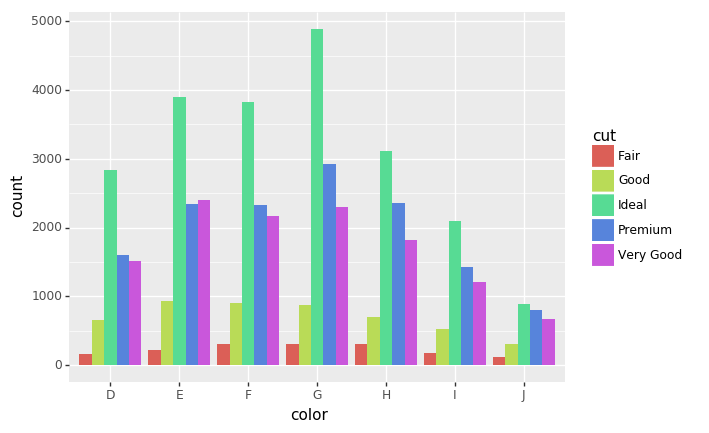

<ggplot: (-9223372036537324740)>

In [513]:
(ggplot(Diamonds,aes(x = 'color',fill='cut')) 
  +geom_bar(position='dodge')
)

In [514]:
scale_color_brewer?

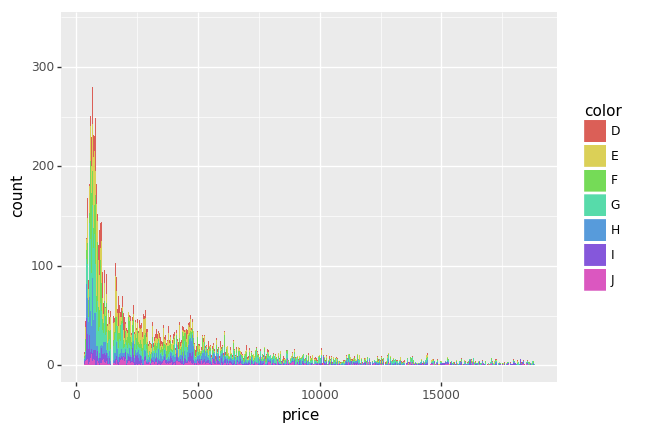

<ggplot: (317493305)>

In [425]:
(
ggplot(Diamonds, aes(x='price',fill='color' ))
 + geom_histogram(binwidth=7)
)    

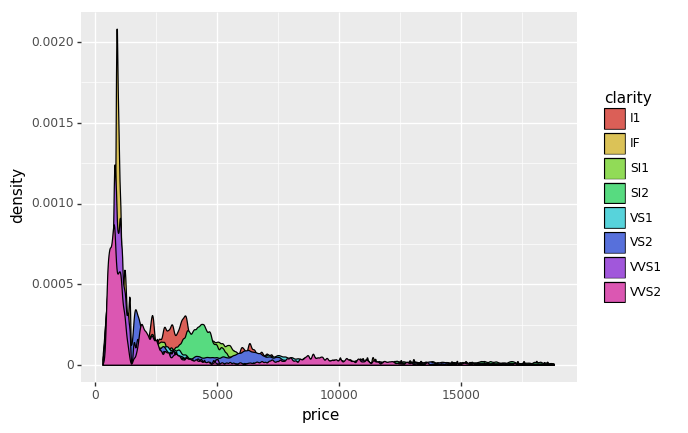

<ggplot: (-9223372036510191321)>

In [511]:
(
ggplot(Diamonds, aes(x='price',fill='clarity' ))
 + geom_density(stat = "density",adjust = 0.1)
)    

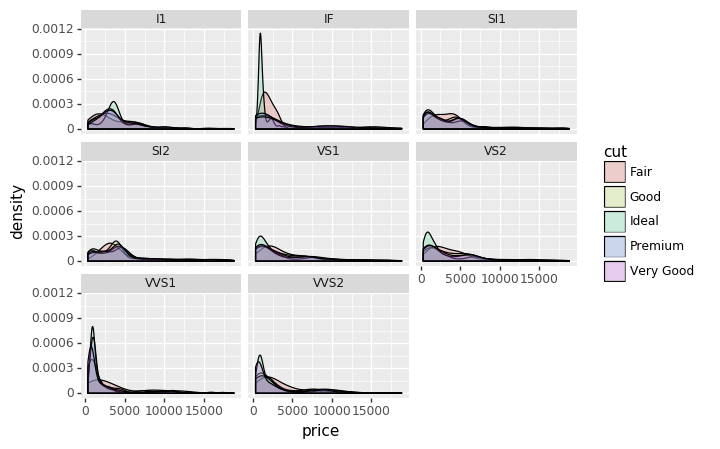

<ggplot: (-9223372036539136042)>

In [491]:
(ggplot(Diamonds, aes(x='price', fill='cut'))
    +geom_density(alpha=0.25)
    +facet_wrap("clarity")
)

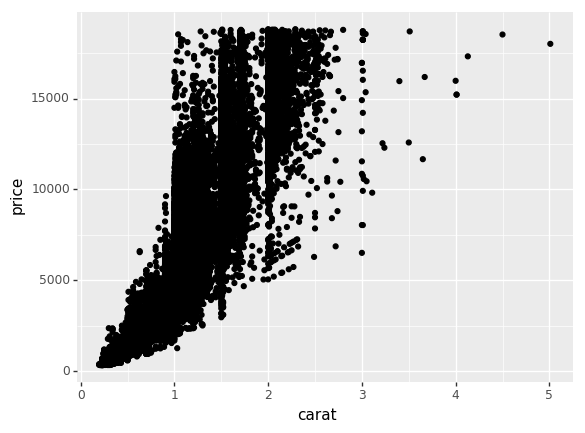

<ggplot: (-9223372036538706453)>

In [438]:
(
ggplot(Diamonds,aes(x='carat',y='price'))
    +geom_point()
)

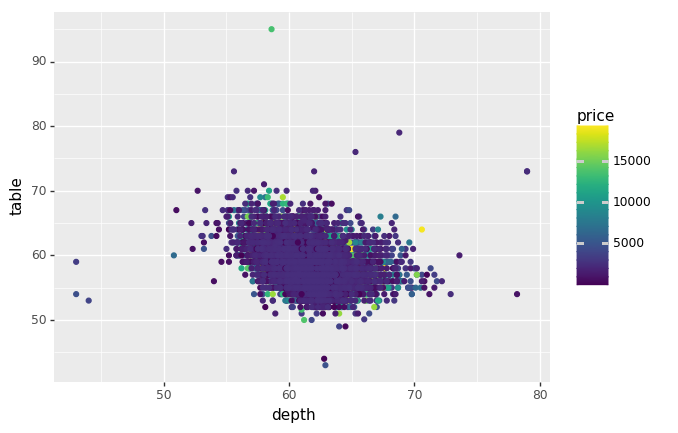

<ggplot: (315173924)>

In [448]:
(
ggplot(Diamonds,aes(x='depth',y='table',color='price'))
    +geom_point()
)

/Users/wangxiaodong/anaconda3/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_point : Removed 36 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


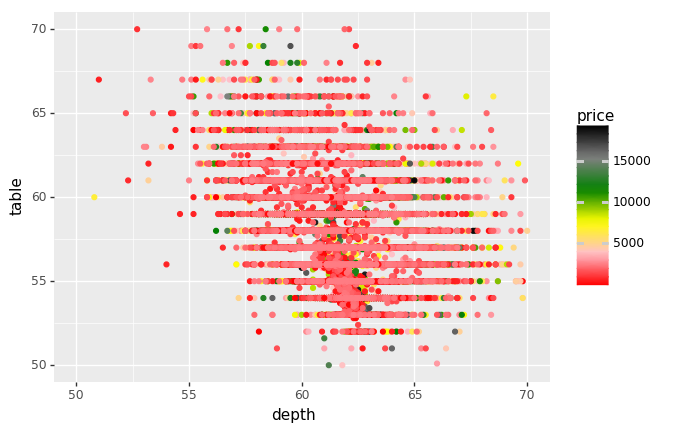

<ggplot: (316322494)>

In [449]:
(
ggplot(Diamonds,aes(x='depth',y='table',color='price'))
    +geom_point()
    +scale_color_gradientn(colors=['red','pink','yellow','green','gray','black'])
    +lims(x=(50,70),y=(50, 70))
)

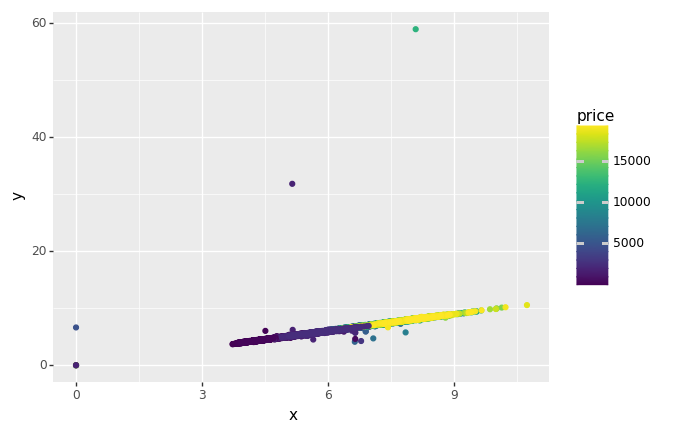

<ggplot: (332618076)>

In [463]:
(
ggplot(Diamonds,aes(x='x',y='y',color='price'))
    +geom_point()
)

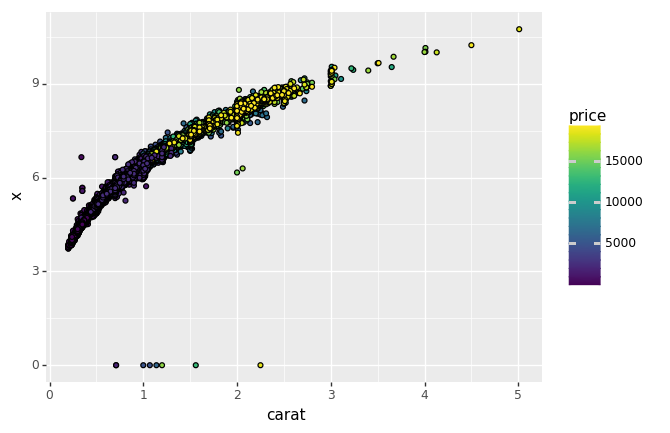

<ggplot: (-9223372036523063422)>

In [464]:
(
ggplot(Diamonds,aes(x='carat',y='x',fill='price'))
    +geom_point()
)

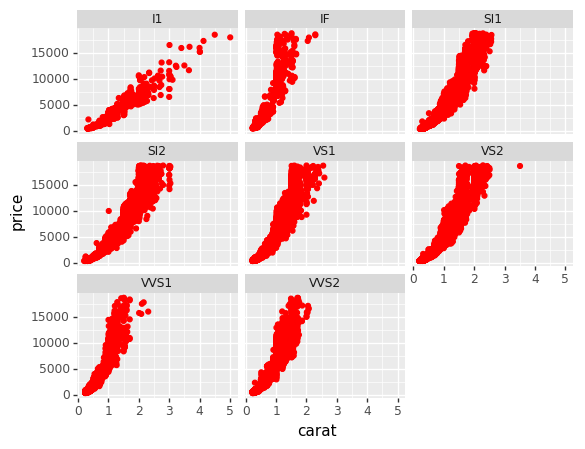

<ggplot: (-9223372036527597557)>

In [504]:
(
ggplot(Diamonds,aes(x='carat',y='price'))
    +geom_point(color='red')
    +facet_wrap('clarity')
)

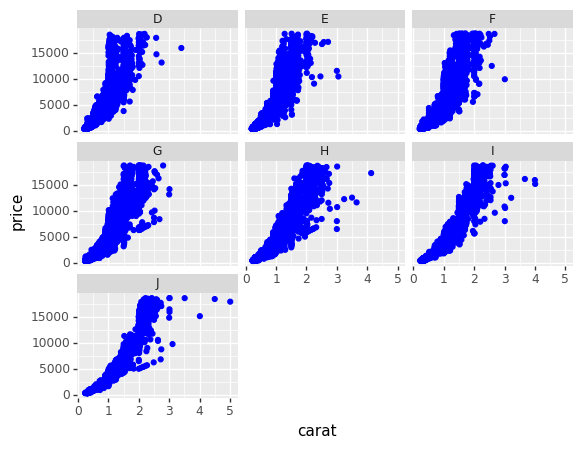

<ggplot: (-9223372036526405288)>

In [505]:
(
ggplot(Diamonds,aes(x='carat',y='price'))
    +geom_point(color='blue')
    +facet_wrap('color')
)